### General Overview of the Real411 Data

In [53]:
import pandas as pd
import spacy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [54]:
filtered_data = pd.read_csv("filtered_data.csv")
target_source= filtered_data["source"]
target_source.value_counts()

source
Twitter/X        227
WhatsApp          25
Other             20
Facebook          12
Other Website      9
Youtube            4
Instagram          3
Radio / TV         2
Name: count, dtype: int64

C:\Users\g21m3012\AppData\Local\Temp\ipykernel_20588\2314493522.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


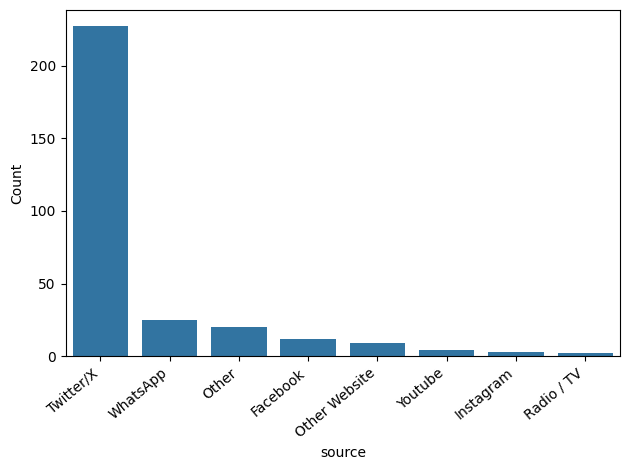

In [55]:
source_count = target_source.value_counts().to_frame(name="Count")

ax = sns.barplot(source_count, x="source", y="Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## Analyzing the emotional and general sentiment of the Twitter data gathered by Real411

In [56]:
nlp = spacy.load("en_core_web_sm")


In [57]:
# getting the data 
df = pd.read_csv("clean_twitter.csv")

# getting all the media files and converting them into one big string
media_text = df["media"].str.cat(sep='\n')

Nouns: 3446 Verbs : 1414


<Axes: xlabel='count', ylabel='type of speach'>

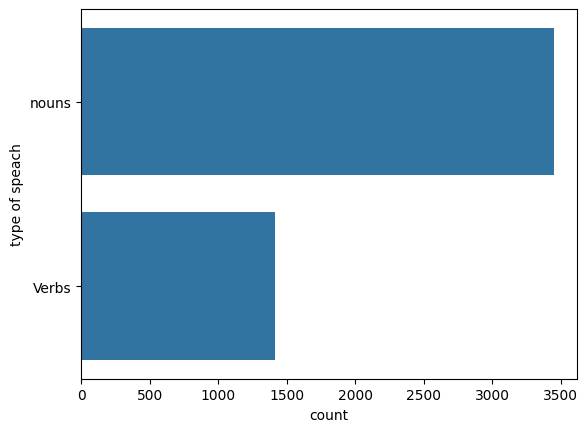

In [58]:
doc = nlp(media_text)

all_nouns = [chunk.text for chunk in doc.noun_chunks]
all_verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
types_of_speach = ["nouns", "Verbs"]

print(f"Nouns: {len(all_nouns)} Verbs : {len(all_verbs)}")


speach = pd.DataFrame(zip(types_of_speach, [len(all_nouns), len(all_verbs)]), columns=["type of speach", "count"])
sns.barplot(speach, x="count", y="type of speach")

#### Checking the sentiment of the twitter Data


In [59]:
from spacytextblob.spacytextblob import SpacyTextBlob

nlp_sent = spacy.load('en_core_web_sm')
nlp_sent.add_pipe("spacytextblob")


def get_sentiment_list(data):
    sentiment = []
    sentiment_label =""
    for i in data:
        sentiment_polarity = nlp_sent(i)._.blob.polarity 
        if sentiment_polarity > 0:
            sentiment_label = "Positive"
        elif sentiment_polarity < 0 :
            sentiment_label = "Negative"
        else:
            sentiment_label = "Neutral"
        sentiment.append(sentiment_label)
    return sentiment


<Axes: xlabel='count', ylabel='Sentiment'>

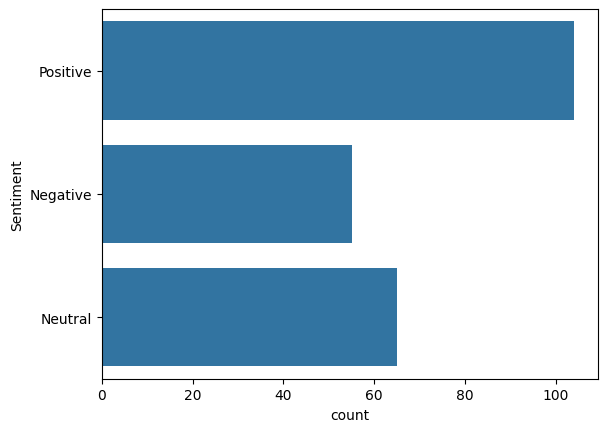

In [60]:
media_list =  media_text.split("\n")

sentiment_list = get_sentiment_list(media_list)

sentFilter = lambda x: [i for i in sentiment_list if i == x]
postive = len(list(sentFilter("Positive")))
negative = len(list(sentFilter("Negative")))
neutral = len(list(sentFilter("Neutral")))

sentDataFrame = pd.DataFrame(zip([postive, neutral, negative], ["Positive", "Negative", "Neutral"]), columns=["count", "Sentiment"])
sns.barplot(sentDataFrame, x="count", y="Sentiment")